In [1]:
import numpy as np
import os
import cv2
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from keras.layers import GlobalAveragePooling2D, Dense, BatchNormalization, Dropout
from keras.optimizers import Adam, SGD, RMSprop
from keras.models import Model, Input
from keras.applications import xception

Using TensorFlow backend.


In [3]:
data_path = os.getcwd()+'/Data-dog-breed-identification/'

In [4]:
df = pd.read_csv(data_path+'labels.csv')
df.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


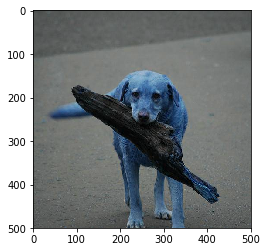

In [5]:
dog = cv2.imread(data_path+'train/'+df.iloc[4]['id']+'.jpg')

plt.imshow(dog)

In [6]:
breed_count_total = df.groupby('breed')['id'].nunique()   ### 120 different breed and each breed has respective no.of images
breed_count_total[:10]

breed
affenpinscher                      80
afghan_hound                      116
african_hunting_dog                86
airedale                          107
american_staffordshire_terrier     74
appenzeller                        78
australian_terrier                102
basenji                           110
basset                             82
beagle                            105
Name: id, dtype: int64

In [7]:
breed_count = df.groupby(by='breed', as_index=False).agg({'id': pd.Series.nunique})
breed_select = breed_count[:12]
breed_select_list =  list(breed_select['breed'])
breed_select

,breed,id
0,affenpinscher,80
1,afghan_hound,116
2,african_hunting_dog,86
3,airedale,107
4,american_staffordshire_terrier,74
5,appenzeller,78
6,australian_terrier,102
7,basenji,110
8,basset,82
9,beagle,105


In [8]:
selectdf = df[df['breed'].isin(breed_select_list)]
selectdf.iloc[0] , len(selectdf)

(id       002211c81b498ef88e1b40b9abf84e1d
 breed                  bedlington_terrier
 Name: 5, dtype: object, 1143)

In [20]:
from sklearn.preprocessing import LabelEncoder
label_enc = LabelEncoder()
np.random.seed(seed=7)
rnd = np.random.random(len(selectdf))
len(rnd)

1143

In [23]:
y_total = label_enc.fit_transform(selectdf["breed"].values)
train_idx = rnd < 0.9 
valid_idx = rnd >= 0.9

In [24]:
y_train = y_total[train_idx]
y_valid = y_total[valid_idx]
len(y_train) , len(y_valid)

(1034, 109)

In [13]:
x_total = selectdf["id"].values
x_train = x_total[train_idx]
x_valid = x_total[valid_idx]
len(x_train) , len(x_valid)

(1034, 109)

In [14]:
input_image_train = []
input_image_valid = []
resize_dim = (299,299)
for i in range(0,len(x_train)) :
    img = cv2.imread(data_path+'train/'+x_train[i]+'.jpg')
    img_resize = cv2.resize(img,resize_dim)
    input_image_train.append(img_resize)
input_image_train = np.asarray(input_image_train)
for i in range(0,len(x_valid)) :
    img = cv2.imread(data_path+'train/'+x_valid[i]+'.jpg')
    img_resize = cv2.resize(img,resize_dim)
    input_image_valid.append(img_resize)
input_image_valid = np.asarray(input_image_valid)

In [15]:
from keras.utils import to_categorical
y_train_onehot = to_categorical(y_train, num_classes=12)
y_valid_onehot = to_categorical(y_valid, num_classes=12)
y_train_onehot

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [16]:
len(input_image_train),len(y_train_onehot),input_image_train.shape,y_train_onehot.shape

(1034, 1034, (1034, 299, 299, 3), (1034, 12))

In [40]:
base_model = xception.Xception(weights=os.getcwd()+'/pretrained_model/xception_weights_tf_dim_ordering_tf_kernels_notop.h5', include_top=False,input_shape=(299,299,3))



In [41]:
base_model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 299, 299, 3)  0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 149, 149, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 149, 149, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 149, 149, 32) 0           block1_conv1_bn[0][0]            
__________________________________________________________________________________________________
block1_con

x = basic_model.input(shape=(299, 299, 3), name='image_input')
x = base_model(input) 
x

In [42]:
for layer in base_model.layers:
    print(layer.trainable)
    layer.trainable = False

x = base_model.output  ## <tf.Tensor 'block14_sepconv2_act_5/Relu:0' shape=(?, ?, ?, 2048) dtype=float32>
x

False
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


<tf.Tensor 'block14_sepconv2_act_1/Relu:0' shape=(?, 10, 10, 2048) dtype=float32>

In [21]:
x = BatchNormalization()(x)  ### <tf.Tensor 'batch_normalization_27/cond/Merge:0' shape=(?, ?, ?, 2048) dtype=float32>
x

<tf.Tensor 'batch_normalization_5/cond/Merge:0' shape=(?, 10, 10, 2048) dtype=float32>

In [22]:
x = GlobalAveragePooling2D()(x)  ###<tf.Tensor 'global_average_pooling2d_8/Mean:0' shape=(?, 2048) dtype=float32>
x

<tf.Tensor 'global_average_pooling2d_1/Mean:0' shape=(?, 2048) dtype=float32>

In [23]:
x = Dropout(0.5)(x)
x

<tf.Tensor 'dropout_1/cond/Merge:0' shape=(?, 2048) dtype=float32>

In [24]:
x = Dense(1024,activation = 'relu')(x)
x

<tf.Tensor 'dense_1/Relu:0' shape=(?, 1024) dtype=float32>

In [25]:
x = Dropout(0.5)(x)
x

<tf.Tensor 'dropout_2/cond/Merge:0' shape=(?, 1024) dtype=float32>

In [26]:
predictions = Dense(12,activation = 'softmax')(x)
predictions

<tf.Tensor 'dense_2/Softmax:0' shape=(?, 12) dtype=float32>

In [27]:
base_model.input

<tf.Tensor 'input_1:0' shape=(?, 299, 299, 3) dtype=float32>

In [28]:
model = Model(inputs = base_model.input, outputs = predictions)

In [29]:
optimizer = RMSprop(lr=0.01, rho=0.9)
model.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=["accuracy"])

In [30]:
input_image_train.shape[0],y_train_onehot.shape[0]

(1034, 1034)

In [31]:
os.getcwd()+"/model_xception_dogbreed.hdf5"

'/Users/bindu-8699/Documents/Documents/deep learning/OwnProjects/classification/model_xception_dogbreed.hdf5'

In [32]:
y_valid[2], y_valid_onehot[2]

(10, array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32))

In [35]:
1034//30

34

In [33]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
batch_size=50
#steps_per_epoch = len(y_train)//batch_size
validation_steps = len(y_valid)

filepath=os.getcwd()+"/model_xception_dogbreed.hdf5"       ##----------------------
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]


history = model.fit(x=input_image_train, y=y_train_onehot, batch_size=30, epochs=5, verbose=1, callbacks=callbacks_list, validation_data=(input_image_valid, y_valid_onehot), shuffle=True)

#history = model.fit(x=input_image_train, y=y_train_onehot, epochs=5, verbose =1,batch_size=batch_size)


Train on 1034 samples, validate on 109 samples
Epoch 1/5
  90/1034 [=>............................] - ETA: 6:47 - loss: 5.5369 - acc: 0.3333

KeyboardInterrupt: 

In [18]:
input_image_train)

numpy.ndarray

In [3]:
input = Input(shape=(1036800,), name='image_input')

In [4]:
input

<tf.Tensor 'image_input:0' shape=(?, 1036800) dtype=float32>

In [279]:
np.asarray(input_image_train).shape

(1034, 299, 299, 3)

In [256]:
data_path+x_train[0]+'.jpg'

'/Users/bindu-8699/Documents/Documents/deep learning/OwnProjects/classification/dog-breed-identification/002211c81b498ef88e1b40b9abf84e1d.jpg'

In [ ]:
dog = cv2.imread(data_path+'train/'+df.iloc[4]['id']+'.jpg')

plt.imshow(dog)

In [289]:
len(y_train)//30

34

In [291]:
len(y_train),34 *30

(1034, 1020)

In [282]:
y_train

array([10, 10,  7, ...,  0,  7,  3])

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [287]:
y_train_onehot[2]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [288]:
y_train[2]

7

In [ ]:
import numpy as np
import os
import cv2
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

from keras.layers import GlobalAveragePooling2D, Dense, BatchNormalization, Dropout
from keras.optimizers import Adam, SGD, RMSprop
from keras.models import Model, Input
from keras.applications import xception
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping, ModelCheckpoint

data_path = os.getcwd()+'/dog-breed-identification/'

df = pd.read_csv(data_path+'labels.csv')
df.head()

#dog = cv2.imread(data_path+'train/'+df.iloc[4]['id']+'.jpg')
#plt.imshow(dog)

#breed_count_total = df.groupby('breed')['id'].nunique()   ### 120 different breed and each breed has respective no.of images
#breed_count_total[:10]


breed_count = df.groupby(by='breed', as_index=False).agg({'id': pd.Series.nunique})
breed_select = breed_count[:12]
breed_select_list =  list(breed_select['breed'])
selectdf = df[df['breed'].isin(breed_select_list)]


label_enc = LabelEncoder()
np.random.seed(seed=7)
rnd = np.random.random(len(selectdf))


y_total = label_enc.fit_transform(selectdf["breed"].values)

train_idx = rnd < 0.9
valid_idx = rnd >= 0.9

y_train = y_total[train_idx]
y_valid = y_total[valid_idx]
#len(y_train) , len(y_valid)

x_total = selectdf["id"].values
x_train = x_total[train_idx]
x_valid = x_total[valid_idx]
#len(x_train) , len(x_valid)

input_image_train = []
input_image_valid = []
resize_dim = (299,299)
for i in range(0,len(x_train)) :
    img = cv2.imread(data_path+'train/'+x_train[i]+'.jpg')
    img_resize = cv2.resize(img,resize_dim)
    input_image_train.append(img_resize)
input_image_train = np.asarray(input_image_train)
for i in range(0,len(x_valid)) :
    img = cv2.imread(data_path+'train/'+x_valid[i]+'.jpg')
    img_resize = cv2.resize(img,resize_dim)
    input_image_valid.append(img_resize)
input_image_valid = np.asarray(input_image_valid)
#
#input_image_train[1].shape , plt.imshow(input_image_train[0]),plt.imshow(input_image_valid[0])
y_train_onehot = to_categorical(y_train, num_classes=12)
y_valid_onehot = to_categorical(y_valid, num_classes=12)



base_model = xception.Xception(weights=os.getcwd()+'/xception_weights_tf_dim_ordering_tf_kernels_notop.h5', include_top=False)
base_model.summary()

for layer in base_model.layers:
    layer.trainable = False

x = base_model.output  ## <tf.Tensor 'block14_sepconv2_act_5/Relu:0' shape=(?, ?, ?, 2048) dtype=float32>

x = BatchNormalization()(x)  ### <tf.Tensor 'batch_normalization_27/cond/Merge:0' shape=(?, ?, ?, 2048) dtype=float32>

x = GlobalAveragePooling2D()(x)  ###<tf.Tensor 'global_average_pooling2d_8/Mean:0' shape=(?, 2048) dtype=float32>

x = Dropout(0.5)(x)
x = Dense(1024,activation = 'relu')(x)

x = Dropout(0.5)(x)

predictions = Dense(12,activation = 'softmax')(x)

model = Model(inputs = base_model.input, outputs = predictions)

optimizer = RMSprop(lr=0.01, rho=0.9)
model.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=["accuracy"])

#y_train_onehot
#len(input_image_train),len(y_train_onehot),input_image_train.shape,y_train_onehot.shape

batch_size=30
steps_per_epoch = len(y_train)//batch_size
validation_steps = len(y_valid)

filepath=os.getcwd()+"/model_incepres_padded_class200aug.best101.hdf5"       ##----------------------
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]


history = model.fit(x=input_image_train, y=y_train_onehot, batch_size=None, epochs=5, verbose=1, callbacks=callbacks_list, validation_data=(input_image_valid, y_valid_onehot), shuffle=True, initial_epoch=0, steps_per_epoch=steps_per_epoch, validation_steps=validation_steps)


Using TensorFlow backend.


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, None, None, 3 864         input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, None, None, 3 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, None, None, 3 0           block1_conv1_bn[0][0]            
__________________________________________________________________________________________________
block1_con

Train on 1034 samples, validate on 109 samples
Epoch 1/5
